Nombre: López Fabián Jesús Manuel

Grupo: 5AV1

Carrera: Licenciatura en Ciencia de Datos

Fecha última modificación: 28/06/2024


Funcionalidad del programa:

Calculo de coeficientes de correlación lineal (Pearson, kendall y Spearman) para el conjunto de datos facies.csv, además de la aplicación de la prueba chi-cuadrada al conjunto de datos bank.csv

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
plt.style.use("ggplot")

In [3]:
facies = pd.read_csv("data/facies_vectors.csv")
facies.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Eliminando las dimensiones "Facies", "Formation", "Well Name" y "NM_M"

In [4]:
facies.drop(["Facies", "Formation", "Well Name", "NM_M"], axis = 1, inplace=True)
facies.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS
0,2793.0,77.45,0.664,9.9,11.915,4.6,1.000
1,2793.5,78.26,0.661,14.2,12.565,4.1,0.979
2,2794.0,79.05,0.658,14.8,13.050,3.6,0.957
3,2794.5,86.10,0.655,13.9,13.115,3.5,0.936
4,2795.0,74.58,0.647,13.5,13.300,3.4,0.915


<Axes: title={'center': 'Coeficiente de Correlación de Pearson'}>

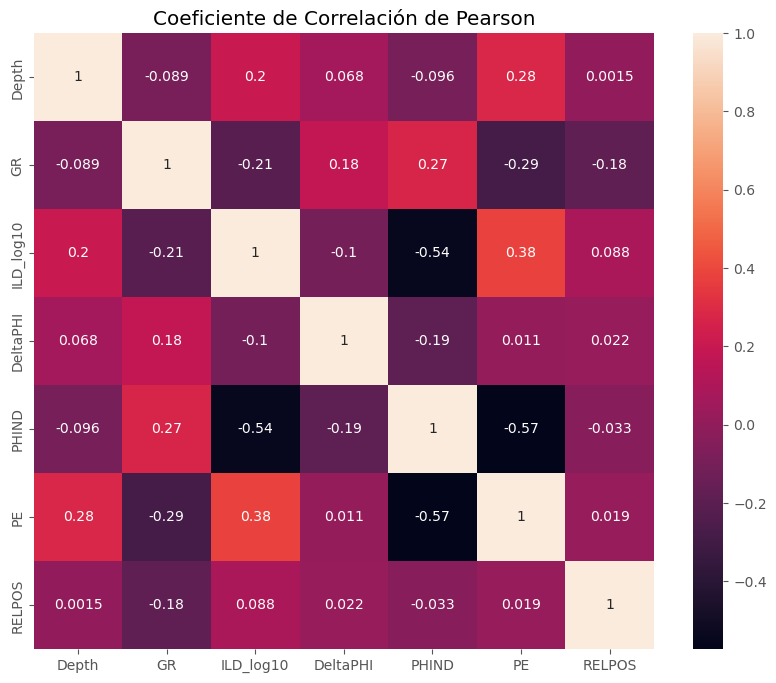

In [18]:
mat_corr = facies.corr(method="pearson")
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("Coeficiente de Correlación de Pearson")
sns.heatmap(mat_corr, annot= True, ax = ax)

<Axes: title={'center': 'Coeficiente de Correlación de Sperman'}>

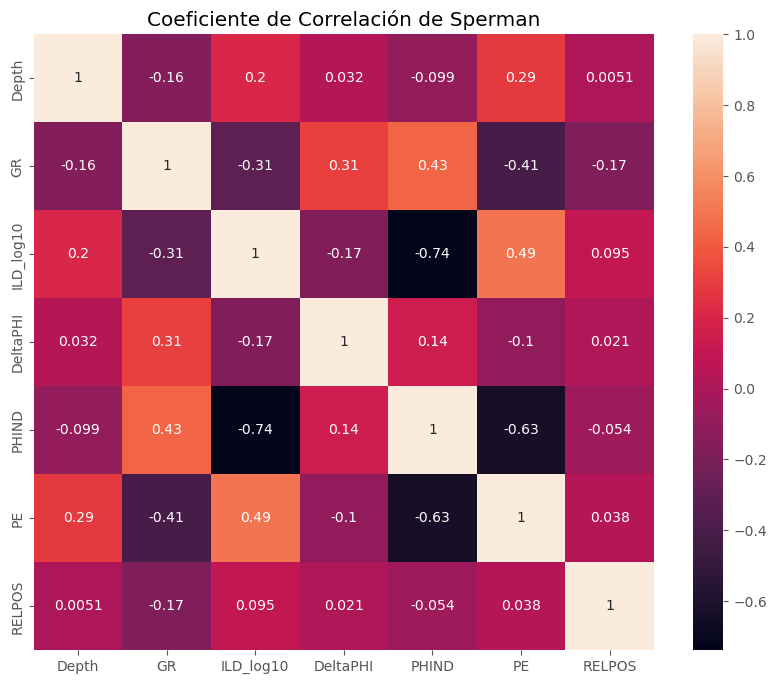

In [ ]:
mat_corr = facies.corr(method="spearman")
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("Coeficiente de Correlación de Sperman")
sns.heatmap(mat_corr, annot= True, ax = ax)

<Axes: title={'center': 'Coeficiente de Correlación de Kendall'}>

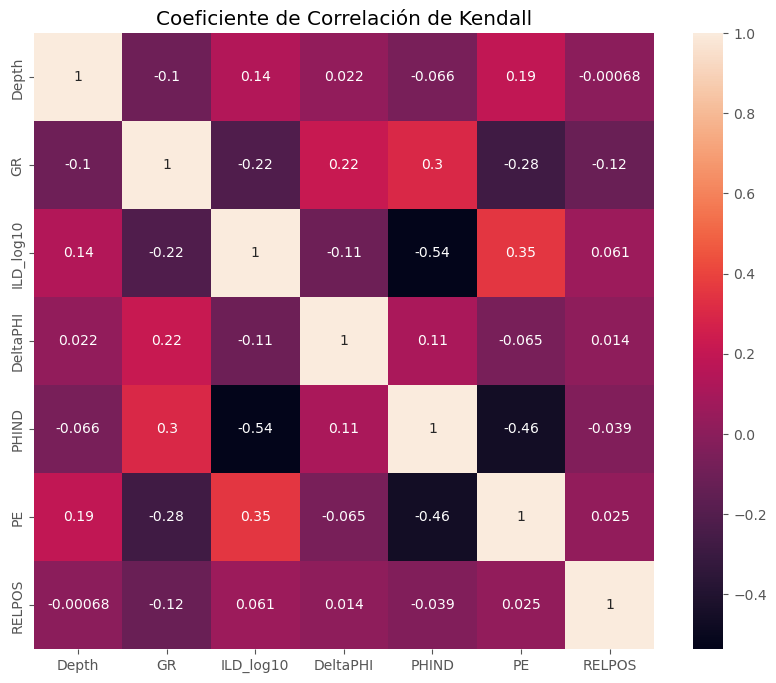

In [ ]:
mat_corr = facies.corr(method="kendall")
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("Coeficiente de Correlación de Kendall")
sns.heatmap(mat_corr, annot= True, ax = ax)

# Prueba chi-cuadrada

In [22]:
bank = pd.read_csv("data/bank.csv", delimiter=";")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [26]:
bank.drop(["age", "balance", "day","duration", "campaign", "pdays", "previous"], axis = 1)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [32]:
results = []

# Iterar sobre cada par de columnas categóricas
for col1 in bank.columns:
    for col2 in bank.columns:
        if col1 != col2 and bank[col1].dtype == 'object' and bank[col2].dtype == 'object':
            contingency_table = pd.crosstab(bank[col1], bank[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            results.append((col1, col2, chi2, p))

# Crear un DataFrame con los resultados
results_bank = pd.DataFrame(results, columns=['Variable1', 'Variable2', 'Chi2', 'P-value'])

# Filtrar los resultados significativos (por ejemplo, p < 0.05)
results_bank['Significativo'] = results_bank['P-value'] < 0.05

# Mostrar el DataFrame con los resultados
results_bank

,Variable1,Variable2,Chi2,P-value,Significativo
0,job,marital,373.181838,1.372525e-65,True
1,job,education,2840.042901,0.000000e+00,True
2,job,default,9.306352,5.936374e-01,False
3,job,housing,380.003636,1.069462e-74,True
4,job,loan,47.191298,1.988689e-06,True
...,...,...,...,...,...
85,y,housing,48.884628,2.714700e-12,True
86,y,loan,21.871822,2.914829e-06,True
87,y,contact,87.869857,8.304301e-20,True
88,y,month,250.500063,2.195355e-47,True


In [33]:
results_bank[results_bank["Significativo"] == True]

,Variable1,Variable2,Chi2,P-value,Significativo
0,job,marital,373.181838,1.372525e-65,True
1,job,education,2840.042901,0.000000e+00,True
3,job,housing,380.003636,1.069462e-74,True
4,job,loan,47.191298,1.988689e-06,True
5,job,contact,226.505555,6.845694e-36,True
...,...,...,...,...,...
85,y,housing,48.884628,2.714700e-12,True
86,y,loan,21.871822,2.914829e-06,True
87,y,contact,87.869857,8.304301e-20,True
88,y,month,250.500063,2.195355e-47,True
